In [1]:
# Neural Net
import theano
from lasagne import layers
from lasagne.nonlinearities import  sigmoid, softmax, rectify, tanh, linear
from lasagne.objectives import categorical_crossentropy, aggregate
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet

# Processing
import os
import cv2
import glob
import math
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv
from skimage.color import rgb2gray
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import f1_score
import cPickle as pickle
import tables
import matplotlib.pyplot as plt
%matplotlib inline

Using gpu device 0: GeForce GTX 770 (CNMeM is enabled with initial size: 45.0% of memory, cuDNN 5004)


# My Starter Code below

In [14]:
'''
Loading data functions
'''
PIXELS = 96
num_features = PIXELS * PIXELS

In [3]:
def load_train_cv(encoder):
    X_train = []
    y_train = []
    print('Read train images')
    # Load data from the 10 subfolders in data
    for j in range(10):
        print('Load folder c{}'.format(j))
        path = os.path.join('..', 'data', 'train', 'c' + str(j), '*.jpg')
        files = glob.iglob(path)
        for fl in files:
            img = cv2.imread(fl,0)
            img = cv2.resize(img, (PIXELS, PIXELS))
            
            # For non-convoluted network
            #img = np.hstack(img)
            
            # For convoluted network
            img = np.reshape(img, (1, num_features))
            
            X_train.append(img)
            y_train.append(j)

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    y_train = encoder.fit_transform(y_train).astype('int32')

    X_train, y_train = shuffle(X_train, y_train)

    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1)

    X_train = X_train.astype('float32') / 255.
    X_test = X_test.astype('float32') / 255.

    return X_train, y_train, X_test, y_test, encoder

In [4]:
def load_test():
    print('Read test images')
    path = os.path.join('..', 'data', 'test', '*.jpg')
    files = glob.glob(path)
    X_test = []
    X_test_id = []
    total = 0
    thr = math.floor(len(files)/10)
    for fl in files:
        flbase = os.path.basename(fl)
        img = cv2.imread(fl,0)
        img = cv2.resize(img, (PIXELS, PIXELS))
        #img = img.transpose(2, 0, 1)
        img = np.hstack(img)
        
        X_test.append(img)
        X_test_id.append(flbase)
        total += 1
        if total%thr == 0:
            print('Read {} images from {}'.format(total, len(files)))

    X_test = np.array(X_test)
    X_test_id = np.array(X_test_id)

    X_test = X_test.astype('float32') / 255.

    return X_test, X_test_id

# Original Starter Code

# Don't think I need this

In [15]:
'''
Loading data functions
'''
PIXELS = 96
imageSize = PIXELS * PIXELS
num_features = imageSize 

def load_train_cv(encoder):
    X_train = []
    y_train = []
    print('Read train images')
    for j in range(10):
        print('Load folder c{}'.format(j))
        path = os.path.join('..', 'data', 'train', 'c' + str(j), '*.jpg')
        files = glob.glob(path)
        for fl in files:
            img = cv2.imread(fl,0)
            img = cv2.resize(img, (PIXELS, PIXELS))
            #img = img.transpose(2, 0, 1)
            img = np.reshape(img, (1, num_features))
            X_train.append(img)
            y_train.append(j)

    X_train = np.array(X_train)
    y_train = np.array(y_train)

    y_train = encoder.fit_transform(y_train).astype('int32')

    X_train, y_train = shuffle(X_train, y_train)

    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1)

    X_train = X_train.reshape(X_train.shape[0], 1, PIXELS, PIXELS).astype('float32') / 255.
    X_test = X_test.reshape(X_test.shape[0], 1, PIXELS, PIXELS).astype('float32') / 255.

    return X_train, y_train, X_test, y_test, encoder

def load_test():
    print('Read test images')
    path = os.path.join('..', 'data', 'test', '*.jpg')
    files = glob.glob(path)
    X_test = []
    X_test_id = []
    total = 0
    thr = math.floor(len(files)/10)
    for fl in files:
        flbase = os.path.basename(fl)
        img = cv2.imread(fl,0)
        img = cv2.resize(img, (PIXELS, PIXELS))
        #img = img.transpose(2, 0, 1)
        img = np.reshape(img, (1, num_features))
        X_test.append(img)
        X_test_id.append(flbase)
        total += 1
        if total%thr == 0:
            print('Read {} images from {}'.format(total, len(files)))

    X_test = np.array(X_test)
    X_test_id = np.array(X_test_id)

    X_test = X_test.reshape(X_test.shape[0], 1, PIXELS, PIXELS).astype('float32') / 255.

    return X_test, X_test_id

# Mine again below

In [4]:
'''
load training data and start training
'''
encoder = LabelEncoder()

# load the training and validation data sets
train_X, train_y, valid_X, valid_y, encoder = load_train_cv(encoder)
print('Train shape:', train_X.shape, 'Test shape:', valid_X.shape)

# load data
X_test, X_test_id = load_test()

Read train images
Load folder c0
Load folder c1
Load folder c2
Load folder c3
Load folder c4
Load folder c5
Load folder c6
Load folder c7
Load folder c8
Load folder c9
('Train shape:', (20181L, 1L, 96L, 96L), 'Test shape:', (2243L, 1L, 96L, 96L))
Read test images
Read 7972 images from 79726
Read 15944 images from 79726
Read 23916 images from 79726
Read 31888 images from 79726
Read 39860 images from 79726
Read 47832 images from 79726
Read 55804 images from 79726
Read 63776 images from 79726
Read 71748 images from 79726
Read 79720 images from 79726


In [16]:
# Simple network without convolution
net1 = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', layers.InputLayer),
        ('hidden', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    # layer parameters:
    input_shape=(None, 10000),  # 100x100 input pixels per batch
    hidden_num_units=100,  # number of units in hidden layer
    output_nonlinearity=softmax,  # output layer uses identity function
    output_num_units=10,  # 10 target values

    objective_loss_function=categorical_crossentropy,
    
    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,
    
    regression=False,  # flag to indicate we're dealing with regression problem
    max_epochs=200,  # we want to train this many epochs
    verbose=1,
    )


net1.fit(train_X, train_y)

with open('net1.pickle', 'wb') as f:
    pickle.dump(net1, f, -1)

# Neural Network with 1001110 learnable parameters

## Layer information

  #  name      size
---  ------  ------
  0  input    10000
  1  hidden     100
  2  output      10

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----
      1       1.89235       2.75393      0.68714      0.21345  0.59s
      2       1.56816       1.78921      0.87646      0.34882  0.42s
      3       1.27868       2.07131      0.61733      0.22145  0.38s
      4       2.02331       1.99329      1.01506      0.19425  0.38s
      5       1.94250       2.01778      0.96269      0.17414  0.38s
      6       1.89211       1.83251      1.03253      0.24875  0.38s
      7       1.81311       1.75440      1.03347      0.29487  0.38s
      8       1.81360       1.73427      1.04575      0.29028  0.40s
      9       1.75211       1.67909      1.04349      0.30353  0.38s
     10       1.70959       1.65786      1.03120      0.31181  0.38s

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x0000000008652048>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x00000000085F8EB8>,
     check_input=True, custom_scores=None, hidden_num_units=100,
     input_shape=(None, 10000),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=200, more_params={},
     objective=<function objective at 0x00000000086503C8>,
     objective_loss_function=<function categorical_crossentropy at 0x00000000083E2CF8>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x000000005A4D4308>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x0000000060796E88>],
     output_nonlinearity=<function softmax at 0x000000000836F6D8

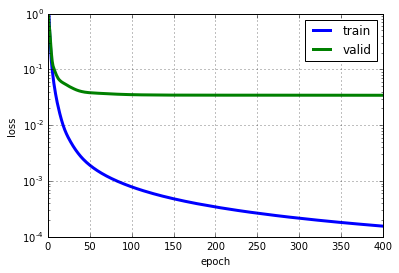

In [23]:
# Graph of train vs validation over time
train_loss = np.array([i["train_loss"] for i in net1.train_history_])
valid_loss = np.array([i["valid_loss"] for i in net1.train_history_])
plt.plot(train_loss, linewidth=3, label="train")
plt.plot(valid_loss, linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.ylim(1e-4, 1e-0)
plt.yscale("log")
plt.show()

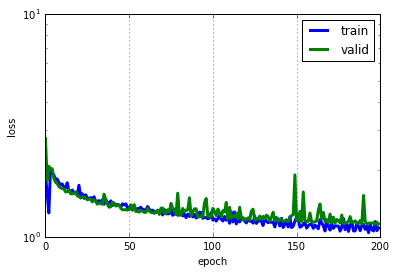

In [18]:
# Graph of train vs validation over time
train_loss = np.array([i["train_loss"] for i in net1.train_history_])
valid_loss = np.array([i["valid_loss"] for i in net1.train_history_])
plt.plot(train_loss, linewidth=3, label="train")
plt.plot(valid_loss, linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.ylim(1e-0, 1e+1)
plt.yscale("log")
plt.show()

In [22]:
'''
Make Submission
'''
predictions = net1.predict_proba(X_test)
print('Creating Submission')
def create_submission(predictions, test_id):
    result1 = pd.DataFrame(predictions, columns=['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'])
    result1.loc[:, 'img'] = pd.Series(test_id, index=result1.index)
    result1.to_csv('submission_distract.csv', index=False)

create_submission(predictions, X_test_id)

In [20]:
# Save loaded numpy arrays to HDF5 filesusing pytables
with tables.openFile('train_X.h5', mode='w', title="train_X Array") as h5file0:
    root0 = h5file0.root
    h5file0.createArray(root0, "train_X", train_X)
with tables.openFile('train_y.h5', mode='w', title="train_y Array") as h5file1:
    root1 = h5file1.root
    h5file1.createArray(root1, "train_y", train_y)
with tables.openFile('valid_X.h5', mode='w', title="valid_X Array") as h5file2:
    root2 = h5file2.root
    h5file2.createArray(root2, "valid_X", valid_X)
with tables.openFile('valid_y.h5', mode='w', title="valid_y Array") as h5file3:
    root3 = h5file3.root
    h5file3.createArray(root3, "valid_y", valid_y)
#with tables.openFile('encoder.h5', mode='w', title="encoder Array") as h5file4:
#    root4 = h5file4.root
#    h5file4.createArray(root4, "encoder", encoder)
with tables.openFile('X_test.h5', mode='w', title="X_test Array") as h5file5:
    root5 = h5file5.root
    h5file5.createArray(root5, "X_test", X_test)
with tables.openFile('X_test_id.h5', mode='w', title="X_test_id Array") as h5file6:
    root6 = h5file6.root
    h5file6.createArray(root6, "X_test_id", X_test_id)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: openFile() is pending deprecation, use open_file() instead. You may use the pt2to3 tool to update your source code.
  if __name__ == '__main__':
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: createArray() is pending deprecation, use create_array() instead. You may use the pt2to3 tool to update your source code.
  app.launch_new_instance()
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: openFile() is pending deprecation, use open_file() instead. You may use the pt2to3 tool to update your source code.
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: createArray() is pending deprecation, use create_array() instead. You may use the pt2to3 tool to update your source code.
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: openFile() is pending deprecation, use open_file() instead. You may use the pt2to3 tool to u

In [13]:
# Load numpy arrays from HDF5 file using pytables
with tables.open_file("train_X.h5", "r") as f0:
    # retrieve an entire numpy array
    train_X = f0.root.train_X[:]  # [:] gets all elements
with tables.open_file("train_y.h5", "r") as f1:
    # retrieve an entire numpy array
    train_y = f1.root.train_y[:]  # [:] gets all elements
with tables.open_file("valid_X.h5", "r") as f2:
    # retrieve an entire numpy array
    valid_X = f2.root.valid_X[:]  # [:] gets all elements
with tables.open_file("valid_y.h5", "r") as f3:
    # retrieve an entire numpy array
    valid_y = f3.root.valid_y[:]  # [:] gets all elements
with tables.open_file("X_test.h5", "r") as f4:
    # retrieve an entire numpy array
    X_test = f4.root.X_test[:]  # [:] gets all elements
with tables.open_file("X_test_id.h5", "r") as f5:
    # retrieve an entire numpy array
    X_test_id = f5.root.X_test_id[:]  # [:] gets all elements

In [18]:
# Convoluted Neural Network
# Valid ACC @ 25 epoch = 0.99200
net2 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('conv3', layers.Conv2DLayer),
        ('pool3', layers.MaxPool2DLayer),
        ('hidden4', layers.DenseLayer),
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, 96, 96),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    hidden4_num_units=500, hidden5_num_units=500,
    output_num_units=10, output_nonlinearity=softmax,
    
    objective_loss_function=categorical_crossentropy,

    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=False,
    max_epochs=25,
    verbose=1,
    )


net2.fit(train_X, train_y)

# Training for 1000 epochs will take a while.  We'll pickle the
# trained model so that we can load it back later:
with open('net2.pickle', 'wb') as f2:
    pickle.dump(net2, f2, -1)

# Neural Network with 8041482 learnable parameters

## Layer information

  #  name     size
---  -------  ---------
  0  input    1x96x96
  1  conv1    32x94x94
  2  pool1    32x47x47
  3  conv2    64x46x46
  4  pool2    64x23x23
  5  conv3    128x22x22
  6  pool3    128x11x11
  7  hidden4  500
  8  hidden5  500
  9  output   10

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       2.11062       1.67650      1.25894      0.39632  16.01s
      2       1.30230       0.80738      1.61300      0.73850  12.57s
      3       0.30391       0.20841      1.45823      0.93655  12.56s
      4       0.10136       0.20433      0.49606      0.93297  12.60s
      5       0.05130       0.12875      0.39846      0.96134  12.59s
      6       0.03172       0.11691      0.27134      0.96495  12.58s
      7       0.01938       0.10033      0.19320      0.97032  12.55s
      8       0.01482       0.05490     

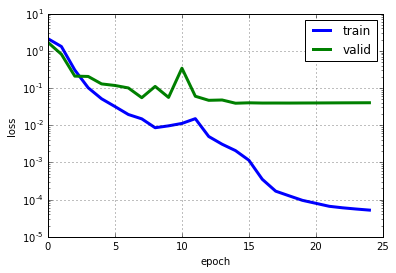

In [21]:
# Graph net2 of train vs validation over time
train_loss = np.array([i["train_loss"] for i in net2.train_history_])
valid_loss = np.array([i["valid_loss"] for i in net2.train_history_])
plt.plot(train_loss, linewidth=3, label="train")
plt.plot(valid_loss, linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.ylim(1e-5, 1e+1)
plt.yscale("log")
plt.show()

In [23]:
# Create submission for net2
predictions2 = net2.predict_proba(X_test)
print('Creating Submission')
create_submission(predictions2, X_test_id)

Creating Submission


# WORKS UP TO HERE

# !!!!!!!!!!!!!!!!!!!!

In [23]:
def float32(k):
    return np.cast['float32'](k)